# **1 - Data Set**

Create a model to predict whether or not a customer will Churn (ending their proccess or subscription).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Classification/Telco_Customer_Churn_Prediction/Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7032, 21)



**Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df_copy = df.copy()

---

# **2 - Exploratory Data Analysis and Feature Engineering**


**Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [ ]:
df_copy.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [ ]:
df_copy.groupby('Churn').describe().transpose()

Churn                          No          Yes
SeniorCitizen  count  5163.000000  1869.000000
               mean      0.128995     0.254682
               std       0.335227     0.435799
               min       0.000000     0.000000
               25%       0.000000     0.000000
               50%       0.000000     0.000000
               75%       0.000000     1.000000
               max       1.000000     1.000000
tenure         count  5163.000000  1869.000000
               mean     37.650010    17.979133
               std      24.076940    19.531123
               min       1.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5163.000000  1869.000000
               mean     61.307408    74.441332
               std      31.094557    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.450000    79.650000
               75%      88.475000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5163.000000  1869.000000
               mean   2555.344141  1531.796094
               std    2329.456984  1890.822994
               min      18.800000    18.850000
               25%     577.825000   134.500000
               50%    1683.600000   703.550000
               75%    4264.125000  2331.300000
               max    8672.450000  8684.800000

---

## **A. Label Count**

**Display the balance of the class labels (Churn) with a Count Plot.**

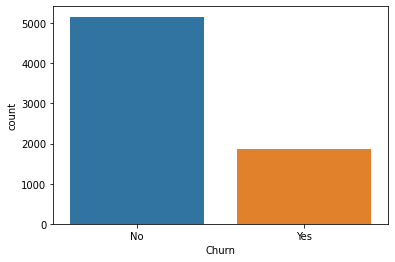

In [ ]:
sns.countplot(x='Churn', data=df_copy);

In [ ]:
df_copy['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

There is imbalanced class

---

## **B. Features Distribution each Churn and Dealing with Outliers**

**Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

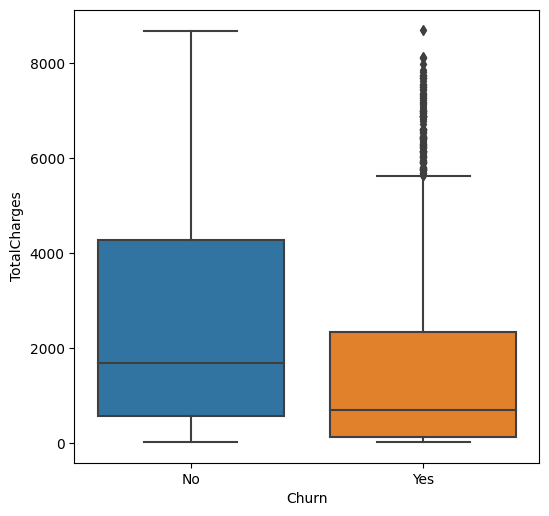

In [ ]:
plt.figure(figsize=(6,6), dpi=100)
sns.boxplot(x='Churn', y='TotalCharges', data=df_copy);

In [ ]:
# check TotalCharges extreme outliers of Churn Yes
drop_row = df_copy[(df_copy['Churn'] == 'Yes') & (df_copy['TotalCharges'] > 8200)]
drop_row

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4602,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.8,8684.8,Yes


In [ ]:
# Drop the extreme outliers
df_copy = df_copy.drop(drop_row.index, axis=0)

* There is an outliers in Churn (Yes) for total charges
* The majority of Churn is between 100 and 2300 total charges lower than custimer who dont Churn, and total charges of Churn is skew to the right (mean > median)

**Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

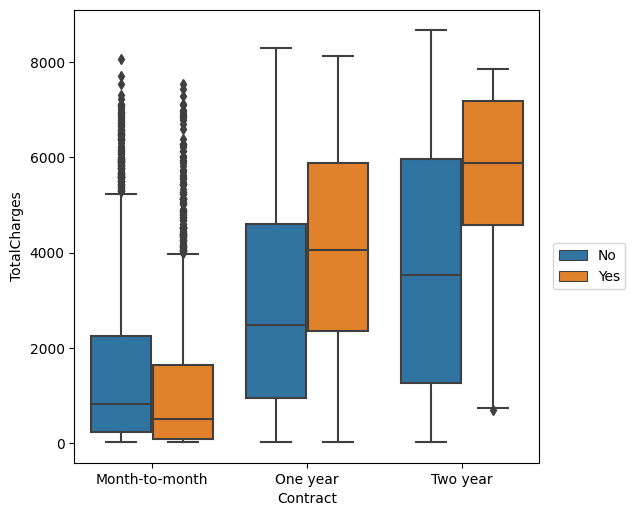

In [ ]:
plt.figure(figsize=(6,6), dpi=100)
sns.boxplot(x='Contract', y='TotalCharges', data=df_copy, hue='Churn')
plt.legend(bbox_to_anchor=(1.2, 0.5));

In [ ]:
# Check TotalCharges extreme outliers on Month-to-month of Churn No
drop_row = df_copy[(df_copy['Churn'] == 'No') & (df_copy['TotalCharges'] > 7500) & (df_copy['Contract'] == 'Month-to-month')]
drop_row

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2074,5804-HYIEZ,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.05,7554.05,No
3814,9481-IEBZY,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),112.90,8061.50,No
5243,2615-YVMYX,Male,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,107.50,7713.55,No


In [ ]:
# Drop the extreme outliers
df_copy = df_copy.drop(drop_row.index, axis=0)

* There are an outliers in the month-to-month contract and total charges of month-to-month contract has higher mean than median.
* Month-to-month contract who Churn has lower range of total charges than non-Churn, because they expect not to be in the service for a long time.
* One year contract and two year contract has customer that likely to churn because of higher total charges, maybe we can give promo coupon to customer after one years subscription.

---

## **C. Features Correlation**



***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [ ]:
# Drop some unused feature for correlation
#df_corr = df_copy.drop(['customerID','tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
df_corr = df_copy.drop('customerID', axis=1)
df_corr.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_corr = pd.get_dummies(df_corr)
df_corr.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [ ]:
df_corr.shape

(7028, 47)

In [ ]:
corr_ser = pd.Series(df_corr.corr()['Churn_Yes'].sort_values().iloc[1:-1])

In [ ]:
corr_ser

tenure                                    -0.354377
Contract_Two year                         -0.301673
InternetService_No                        -0.227668
StreamingTV_No internet service           -0.227668
TechSupport_No internet service           -0.227668
DeviceProtection_No internet service      -0.227668
OnlineBackup_No internet service          -0.227668
OnlineSecurity_No internet service        -0.227668
StreamingMovies_No internet service       -0.227668
TotalCharges                              -0.199949
PaperlessBilling_No                       -0.191561
Contract_One year                         -0.178924
OnlineSecurity_Yes                        -0.171406
TechSupport_Yes                           -0.165173
Dependents_Yes                            -0.163041
Partner_Yes                               -0.150048
PaymentMethod_Credit card (automatic)     -0.134569
InternetService_DSL                       -0.124209
PaymentMethod_Bank transfer (automatic)   -0.118788
PaymentMetho

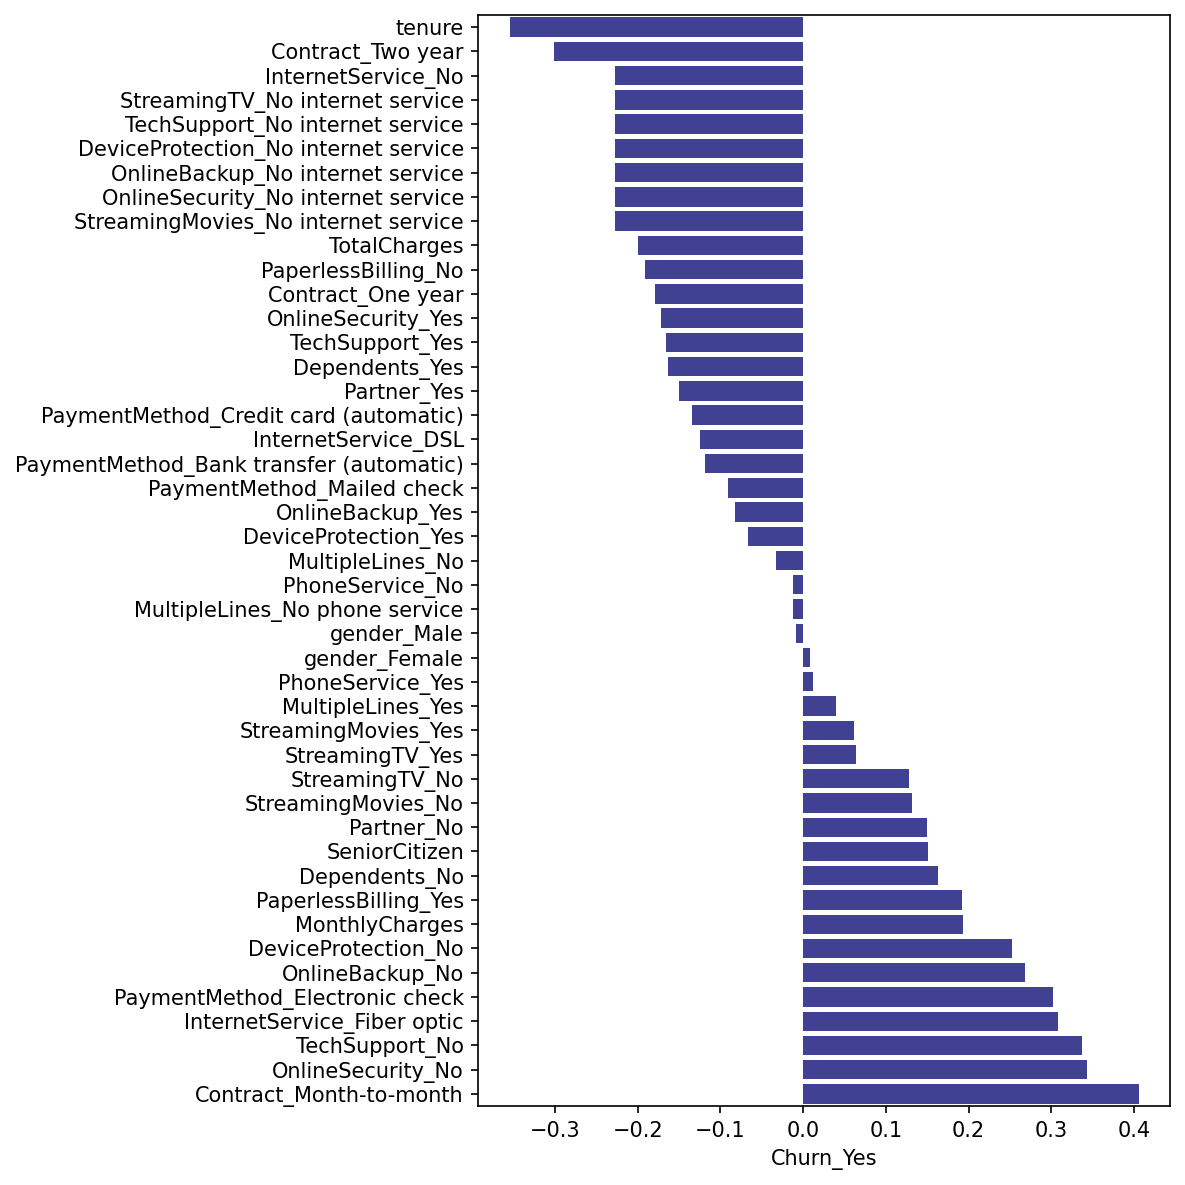

In [ ]:
plt.figure(figsize=(8,8), dpi=150)
sns.barplot(y=corr_ser.index, x=corr_ser, color='darkblue', alpha=0.8)
plt.tight_layout();

---


## **D. Churn Analysis**

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [ ]:
df_copy['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

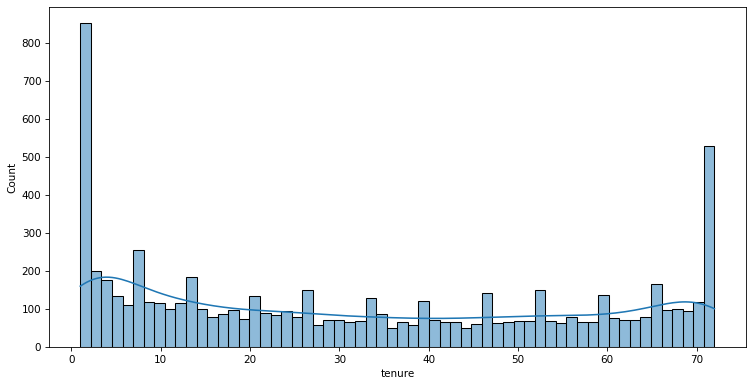

In [ ]:
plt.figure(figsize=(12,6), dpi=75)
sns.histplot(df_copy['tenure'], kde=True, bins=60);

* The highest tenure is in between 1 and 12 months, so there are many customer who contract around that range, maybe because they are trying this service performance before deciding to extend or not.
* There is lower tenure in range between 12 and 60. Some customer dont extend their service after around 12 months using month-to-month contract.
* The 2nd highest tenure is in between 60 and 72 months, there are some customer who bought two-year-contract.

**Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

<Figure size 2000x600 with 0 Axes>

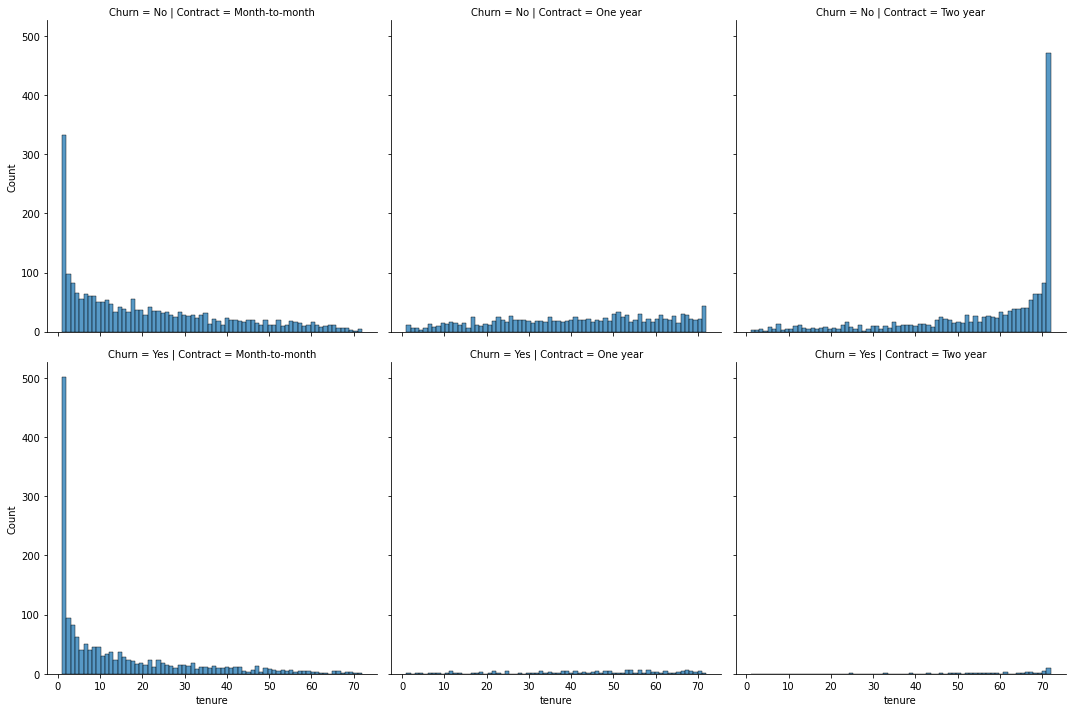

In [ ]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df_copy, x='tenure', bins=70, col='Contract', row='Churn');

* Customer who likely to Churn is have contract of month-to-month and mostly only subscribe for one-month.
* To decrease customer who Churn we can improve our service like more stable internet service and reasonable monthly price for month-to-month contract or we can give them promo code if subscribe for certain time.

**Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

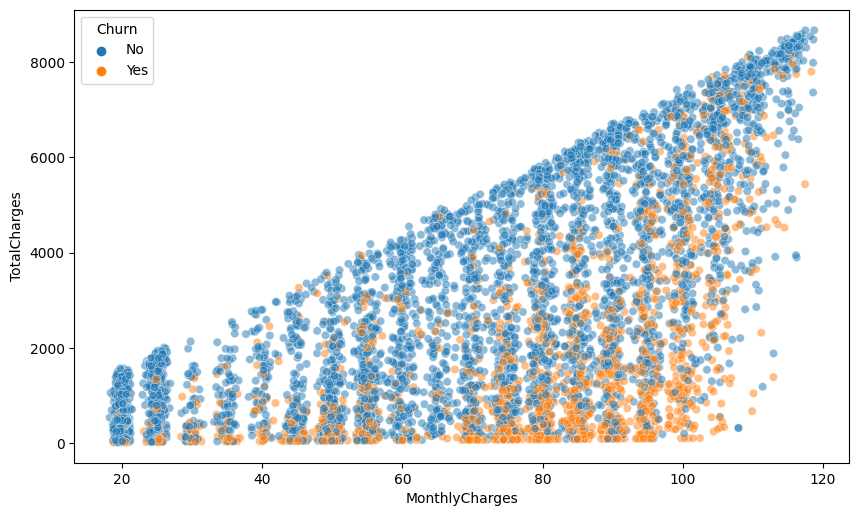

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df_copy, hue='Churn', alpha=0.5);

* Customer who likely to Churn have higher monthly charges and total charges

---

### **a. Churn Rates per Tenure**

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [ ]:
len(df_copy['tenure'].unique())

72

In [ ]:
churn_rates_list = []

# calculate rates of churn per tenure
for i in range(1,73):
  no_churn = len(df_copy[(df_copy['Churn'] == 'No') & (df_copy['tenure'] == i)])
  yes_churn = len(df_copy[(df_copy['Churn'] == 'Yes') & (df_copy['tenure'] == i)])
  rates = 100 * yes_churn/(yes_churn + no_churn)
  churn_rates_list.append(rates)

**Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

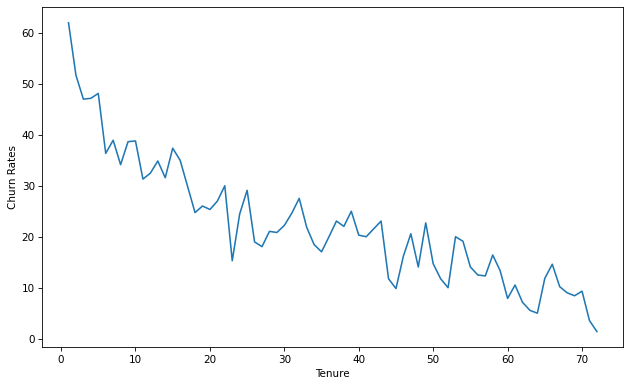

In [ ]:
plt.figure(figsize=(10,6), dpi=75)
plt.plot(range(1,73), churn_rates_list);
plt.xlabel('Tenure')
plt.ylabel('Churn Rates');

* Customer who churn has likely lower tenure

**CARA LAIN**

In [ ]:
# count Churn per tenure
#df_copy.groupby(['Churn','tenure']).count().transpose().head()

In [ ]:
# divide churn to yes and no churn
#yes_churn = df_copy.groupby(['Churn','tenure']).count().transpose()['Yes'].loc['customerID']
#no_churn = df_copy.groupby(['Churn','tenure']).count().transpose()['No'].loc['customerID']

In [ ]:
# calculate yes churn rates
#churn_rates = yes_churn/(yes_churn + no_churn) * 100

In [ ]:
#churn_rates

In [ ]:
#plt.figure(figsize=(10,6), dpi=75)
#plt.plot(churn_rates.index, churn_rates)
#plt.xlabel('Tenure')
#plt.ylabel('Churn Rates');

---

### **b. Creating Cohorts based on Tenure**
**Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [ ]:
def cohort(tenure):
  if tenure <= 12:
    return '0-12 Months'
  elif tenure <= 24:
    return '12-24 Months'
  elif tenure <= 48:
    return '24-48 Months'
  else:
    return 'Over 48 Months'

In [ ]:
df_copy['Tenure Cohort'] = df_copy['tenure'].apply(cohort)

In [ ]:
df_copy[['tenure', 'Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

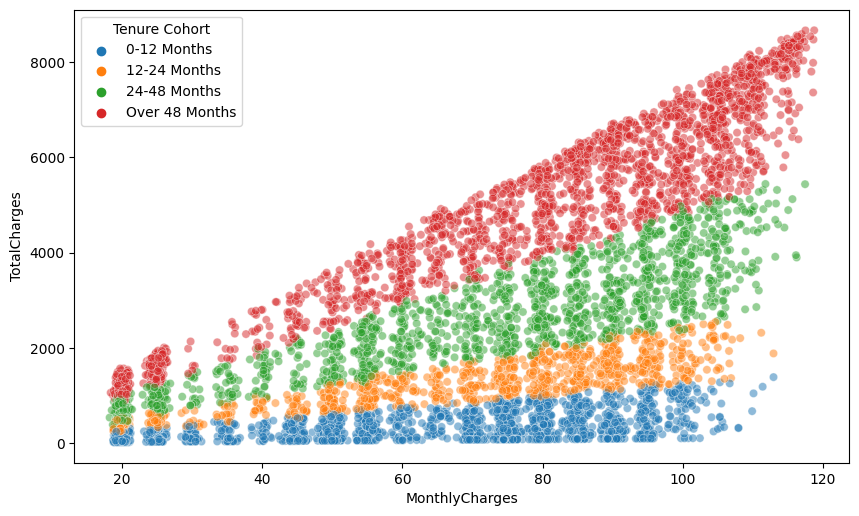

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df_copy, hue='Tenure Cohort', alpha=0.5, hue_order=sorted(df_copy['Tenure Cohort'].unique()));

* Customer who has longer tenure has higher Total Charges

**Create a count plot showing the churn count per cohort.**

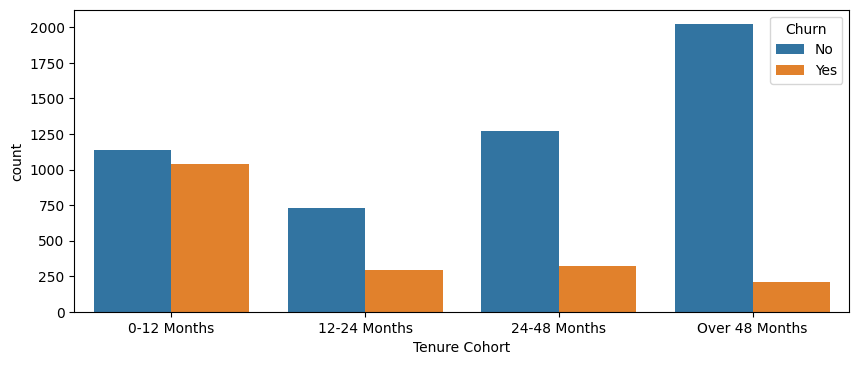

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(data=df_copy, x='Tenure Cohort', hue='Churn', order=sorted(df_copy['Tenure Cohort'].unique()));

* Customer who have tenure between 0 and 12 months have almost the same likely to churn or not, but have the highest likely to churn compared to the longer tenure.
* Customer who have tenure longer than 12 months tends to not churn.

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

<Figure size 2000x800 with 0 Axes>

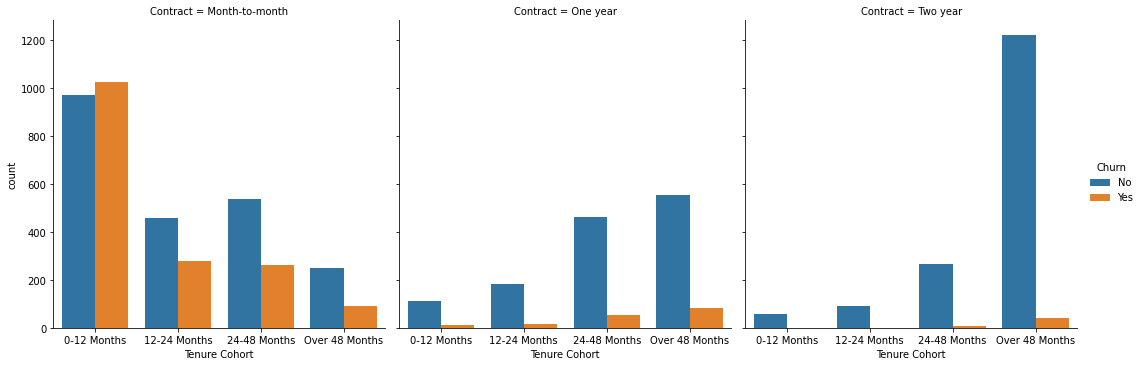

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df_copy, x='Tenure Cohort', hue='Churn', col='Contract', kind='count', order=sorted(df_copy['Tenure Cohort'].unique()));

* Customer who have contract month-to-month have highest chance to churn in the first year but going down in the following year. Yet the customer have highest tends to churn compared to the other contract.
* Customer who have contract one years and two years have likely not to churn every year far higher than churn.

## **E. Convert Categorical Features (One Hot Encoding)**

Create dummy variables where necessary and note which features are not useful and should be dropped


In [ ]:
df_dummies = pd.get_dummies(df_copy.drop(['customerID','Churn','Tenure Cohort'], axis=1), drop_first=True)
df_class = df_copy['Churn']
df_clean = pd.concat([df_dummies, df_class], axis=1)
df_clean['Churn'] = df_clean['Churn'].map({'No':0, 'Yes':1})
df_clean.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
df_clean.shape

(7028, 31)

---
---

# **3 - Machine Learning Model**

Predictive Modeling

## **A. Setup**

### **Stratified Train | Test Split**

**Separate out the data into X features and Y label.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

In [ ]:
from collections import Counter
print(Counter(y))

Counter({0: 5160, 1: 1868})


**Perform a train test split, holding out 10% of the data for testing and using stratify to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.**

In [ ]:
# Split the data with stratify on y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=np.array(y))

In [ ]:
X_train.shape

(6325, 30)

In [ ]:
Counter(y_train)

Counter({0: 4644, 1: 1681})

In [ ]:
X_test.shape

(703, 30)

In [ ]:
Counter(y_test)

Counter({0: 516, 1: 187})

---

## **B. Tree-Based Oversampling Model Comparison**

Kita cari tree-based model yang memiliki score tertinggi berdasarkan cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
# oversampling minority class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=101)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# use imblearn pipeline not sklearn pipeline to be able using smote
from imblearn.pipeline import Pipeline, make_pipeline

# using pipe to oversampling the training set only
DT_pipe = make_pipeline(smote, DecisionTreeClassifier())
RF_pipe = make_pipeline(smote, RandomForestClassifier())
GB_pipe = make_pipeline(smote, GradientBoostingClassifier())
AB_pipe = make_pipeline(smote, AdaBoostClassifier())

In [ ]:
pipe_list = [('DT', DT_pipe), 
              ('RF', RF_pipe),
              ('GB', GB_pipe),  
              ('AB', AB_pipe)]

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model_scores = []

for name, pipe in pipe_list:
  skf = StratifiedKFold(n_splits=5)

  # using cross validation to split between train and validation (then oversampling the training set)
  score = cross_val_score(pipe, X_train, y_train, cv=skf, scoring='f1')
  model_scores.append((name, score.mean()))
  #print(f'{name:<7}: {scores.mean():.5f}')

for name, score in model_scores:
  print(f'{name:<7}: {score:.5f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

DT     : 0.49800
RF     : 0.55790
GB     : 0.61025
AB     : 0.62222


AdaBoost have highest score, so we use that for our model.

---

## **C. AdaBoost Oversampling with Grid Search and SMOTE**

In [ ]:
smote = SMOTE(random_state=101)

In [ ]:
AB = AdaBoostClassifier()

In [ ]:
operations = [('smote', smote),
              ('AB', AB)]

In [ ]:
pipe = Pipeline(operations)

In [ ]:
# using pipeline, must match the format
param_grid = {'smote__k_neighbors':[1,3,5,7], 
              'smote__ratio':[0.7,0.8,0.9,1.0], 
              'AB__n_estimators':[10,20,30,40,50,60], 
              'AB__learning_rate':[0.1,0.4,0.5,0.6,1.0]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
skf = StratifiedKFold(n_splits=5)

# Using pipe to oversampling training set only within CV 
grid_ab_model = GridSearchCV(pipe, 
                             param_grid,
                             cv=skf, 
                             scoring='f1', 
                             verbose=1
                             )

---

### **a. Fit/Train Model**

In [ ]:
grid_ab_model.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=101, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('AB',
                                        AdaBoostClassifier(algorithm=...
                                                           base_estimator=None,
                                                           learning_rate=1.0,
                                                           n_esti

---

### **b. Model Best Parameters and Score**

In [ ]:
grid_ab_model.best_params_

{'AB__learning_rate': 0.4,
 'AB__n_estimators': 50,
 'smote__k_neighbors': 3,
 'smote__ratio': 1.0}

In [ ]:
grid_ab_model.best_estimator_[1]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.4,
                   n_estimators=50, random_state=None)

In [ ]:
# validation score
grid_ab_model.best_score_

0.6384497460865036

---

### **c. Feature Importances**

In [ ]:
grid_ab_model.best_estimator_[1].feature_importances_

array([0.08, 0.12, 0.  , 0.  , 0.24, 0.16, 0.02, 0.  , 0.  , 0.02, 0.04,
       0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.  , 0.04, 0.02, 0.  , 0.02,
       0.  , 0.02, 0.02, 0.04, 0.02, 0.  , 0.1 , 0.  ])

In [ ]:
feats = pd.DataFrame(data=grid_ab_model.best_estimator_[1].feature_importances_, 
                     index=X.columns, 
                     columns=['Importance'])

In [ ]:
feats = feats[feats['Importance'] > 0].sort_values('Importance')

In [ ]:
feats

,Importance
OnlineBackup_Yes,0.02
Contract_One year,0.02
StreamingMovies_Yes,0.02
Dependents_Yes,0.02
MultipleLines_Yes,0.02
OnlineSecurity_Yes,0.02
PaperlessBilling_Yes,0.02
TechSupport_Yes,0.02
StreamingTV_Yes,0.02
Contract_Two year,0.04


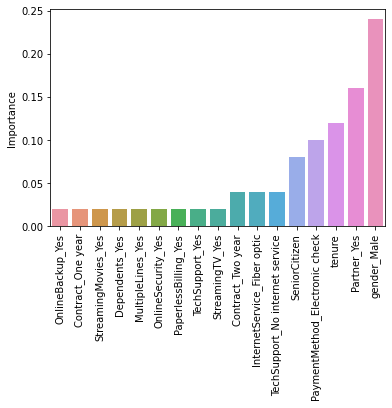

In [ ]:
sns.barplot(data=feats, x=feats.index, y='Importance')
plt.xticks(rotation=90);

---

### **d. Performance Evaluation**

#### **Classification Metrics on Hold-out Data (Test Set)**

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
y_pred = grid_ab_model.best_estimator_[1].predict(X_test)

In [ ]:
# test score
f1_score(y_test, y_pred)

0.6263157894736843

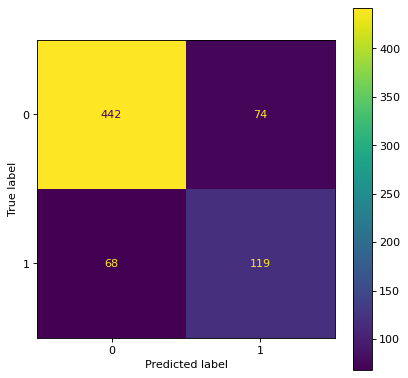

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), dpi=80)
plot_confusion_matrix(grid_ab_model.best_estimator_[1], X_test, y_test, values_format='d', ax=ax);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       516
           1       0.62      0.64      0.63       187

    accuracy                           0.80       703
   macro avg       0.74      0.75      0.74       703
weighted avg       0.80      0.80      0.80       703



This model is good on predicting non-Churn (0) but not good on predicting Churn (1), you can use another model or try to decrease FP/Recall on Churn (1) without sacrificing FN too much. If you want to deploy this model, you must check again if model predict Churn (1) by human checker.

---

#### **Number of Estimator vs Error**

In [ ]:
pipe = Pipeline([('smote', SMOTE(k_neighbors=3, ratio=1.0, random_state=101)), 
                   ('AB', AdaBoostClassifier(learning_rate=0.4))])
skf = StratifiedKFold(n_splits=5)

train_error_rates = []
test_error_rates = []

for n in range(1,71):

  grid_pipe = GridSearchCV(pipe, 
                           param_grid={'AB__n_estimators':[n]}, 
                           scoring='f1', 
                           cv=skf)
  
  grid_pipe.fit(X_train, y_train)

  y_train_pred = grid_pipe.best_estimator_[1].predict(X_train)
  train_error = 1 - f1_score(y_train, y_train_pred)
  train_error_rates.append(train_error)

  y_test_pred = grid_pipe.best_estimator_[1].predict(X_test)
  test_error = 1 - f1_score(y_test, y_test_pred)
  test_error_rates.append(test_error)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

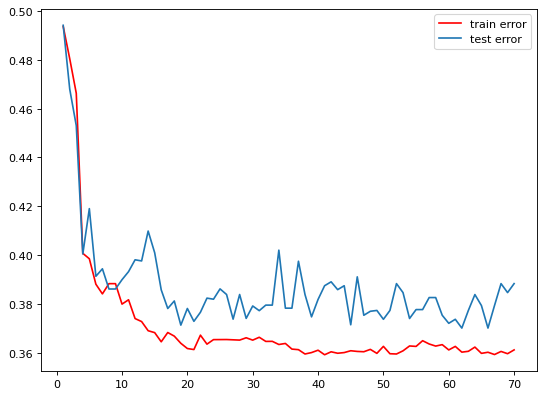

In [ ]:
plt.figure(figsize=(8,6), dpi=80)
plt.plot(range(1,71), train_error_rates, color='red', label='train error')
plt.plot(range(1,71), test_error_rates, label='test error')
plt.legend();

---
---